In [202]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score
from math import sqrt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
from sklearn import svm
from sklearn import datasets
import statsmodels.api as sm
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler 
#from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as sm
import statsmodels.tools

import data

In [203]:
df = pd.read_csv("C:/Users/mgirm/Downloads/student-mat.csv",sep=';',encoding='utf-8')

In [204]:
len(df.columns)

33

# Setup a Treshold 

In [182]:
np.percentile(df.G3,[25,50,75,95,99,10])

array([ 8., 11., 14., 17., 19.,  5.])

In [183]:
pd.Series(np.where(df.G3>14,1,0)).value_counts()

0    322
1     73
dtype: int64

In [184]:
df['Target']=pd.Series(np.where(df.G3>14,1,0))

In [185]:
df["school"].unique()

array(['GP', 'MS'], dtype=object)

In [186]:
df.loc[df.Target==1,:].shape[0]/df.shape[0]

0.1848101265822785

In [187]:
df.loc[(df.Target==1)& (df.school=='GP'),:].shape[0]/df.shape[0]

0.16962025316455695

In [188]:
df.loc[(df.Target==1)& (df.school=='MS'),:].shape[0]/df.shape[0]

0.015189873417721518

#of once are 18 %  and when school is MS you get only 0.2% 

In [189]:
x_=df.loc[(df.Target==1)& (df.school=='GP'),:].shape[0]/df.loc[(df.school=='GP'),:].shape[0]

% of GP is high when value is > is 1 

In [190]:
x_/(df.loc[df.Target==1,:].shape[0]/df.shape[0])

1.038780076147113

19 are 1 

# Data Dleaning and Data Exploration

In [205]:
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [192]:
df.shape

(395, 34)

In [125]:
df.tail(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [126]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

some students have G3 scores are 0 means student didnt attend exams hence need to drop this data

In [128]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [206]:
df.drop(df[df.G3==0].index,inplace=True)  #cleanup vlaues where G3 is zero i.e Target is 0

In [130]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.268908,11.358543,11.523810
std,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.240450,3.147188,3.227797
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,5.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000,9.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [207]:
df.groupby('sex')['G3'].mean()

sex
F    11.205405
M    11.866279
Name: G3, dtype: float64

# Plotting G1,G2 and G3 to get idea of distribution of Grades

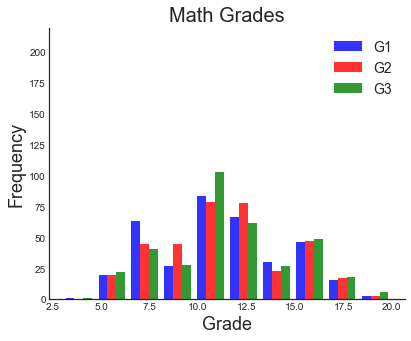

In [208]:
fig = plt.figure(figsize=(14,5))
plt.style.use('seaborn-white')
ax1 = plt.subplot(121)
plt.hist([df['G1'], df['G2'], df['G3']], label=['G1', 'G2', 'G3'], color=['blue', 'red', 'green' ], alpha=0.8)
plt.legend(fontsize=14)
plt.xlabel('Grade', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Math Grades', fontsize=20)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.ylim(0,220)

plt.show()

# G1,G2 and G3 have similar distributions hence i will use G3 as final Grade to represent students performance .

In [209]:
#Math dataset
#create Aalc
df.loc[:,'Aalc'] = (df['Dalc']*5 + df['Walc']*2)/7
#remove not interested variables
#"paid" has "no" values for all entries, so we will also drop it.
df = df.drop(['G1', 'G2', 'Dalc', 'Walc', 'paid'], axis=1)

In [210]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'G3', 'Aalc'],
      dtype='object')

C:\Users\mgirm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


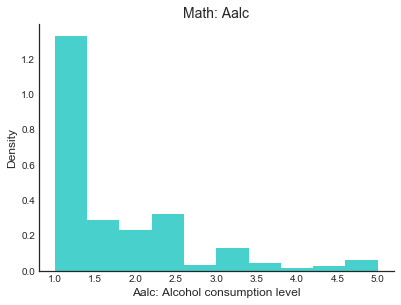

In [251]:
#visualize Aalc
fig = plt.figure(figsize=(14,10))

ax1 = plt.subplot(221)
plt.hist(df['Aalc'], bins=10, normed=True, color='#48D1CC')
plt.title('Math: Aalc', fontsize=14)
plt.xlabel('Aalc: Alcohol consumption level', fontsize=12)
plt.ylabel('Density', fontsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

From Desity plot of Aalc most stundents fall in the range of 1-1.5 meaning they consume alcholol at very low.

The above graph shows a reverse inverse relation between Aalc and G3

# Plotting Absence

(0, 32)

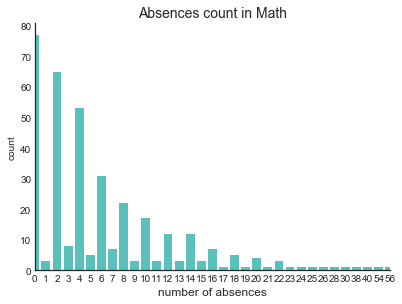

In [296]:
#Visualize absence
fig = plt.figure(figsize=(14,10))

ax1 = plt.subplot(221)
sns.countplot(df['absences'], color='#48D1CC')
plt.title('Absences count in Math', fontsize=14)
plt.xlabel('number of absences', fontsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.xlim((0,32))


Negative relation between G3 and Absence is shown in above plots

In [214]:
df.tail(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G3,Aalc
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,11,9,4.285714
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,2,3,16,3.285714
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,7,3.000000
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,5,0,10,3.285714
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,yes,no,3,2,3,5,5,9,3.000000


# Identifying Categorical_Columns

In [245]:
Categorical_= df.iloc[:,np.where([type(df[i][0])==str for i in df.columns])[0]]
[Categorical_Columns for Categorical_Columns in Categorical_.columns]

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [215]:
#Identify target variable y and predictor variables X.
y = df['G3']
X = df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'Aalc']]
#Convert dummy variables values into 0/1.
X.school = X['school'].replace(['GP', 'MS'], [1,0])
X.sex = X['sex'].replace(['F','M'],[1,0])
X.address = X['address'].replace(['U','R'], [1,0])
X.famsize = X['famsize'].replace(['LE3','GT3'], [1,0])
X.Pstatus = X['Pstatus'].replace(['T','A'], [1,0])
X.schoolsup = X['schoolsup'].replace(['yes','no'],[1,0])
X.famsup = X['famsup'].replace(['yes','no'],[1,0])
X.activities = X['activities'].replace(['yes','no'],[1,0])
X.nursery = X['nursery'].replace(['yes','no'],[1,0])
X.higher = X['higher'].replace(['yes','no'],[1,0])
X.internet = X['internet'].replace(['yes','no'],[1,0])
X.romantic = X['romantic'].replace(['yes','no'],[1,0])
#Identify norminal variables
norminal_vars = ['Fjob', 'Mjob', 'reason','guardian']
#Convert norminal variables to dummy variables
X = pd.get_dummies(X, columns = norminal_vars, drop_first=True)
# Split data into training and test data sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

C:\Users\mgirm\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [334]:
# Linear Regression without GridSearch

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)   

lm = LinearRegression()

#Next we do cross validation, which splits apart our training data and fits the model on different samples and 
# gives scores for each sample to get the best fit model before we test it on the testing data.

scores = cross_val_score(lm, X_train, y_train, cv = 5)    

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(lm, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold
print("accuracy of predictions ",accuracy)

#If this is good, continue to fit the model on the data


lm.fit(X_train, y_train)

y_hat = lm.predict(X_test)      #this gives me my predictions

print("my model performance",lm.score(X_test, y_test))

accuracy of predictions  -0.02168931768172233
my model performance 0.252392653331171


Applying alogriths . Decision Tree

In [293]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
def decisiontree (X_train, y_train, X_test, y_test):
    param_grid = {'max_depth': range(1,100)}
    grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
    print ('Best parameters:', grid.best_params_)
    print ('Test score:', grid.score(X_test, y_test))

In [294]:
decisiontree(X_train, y_train, X_test, y_test)

Best cross validation score: 0.03
Best parameters: {'max_depth': 1}
Test score: 0.047879382104282886


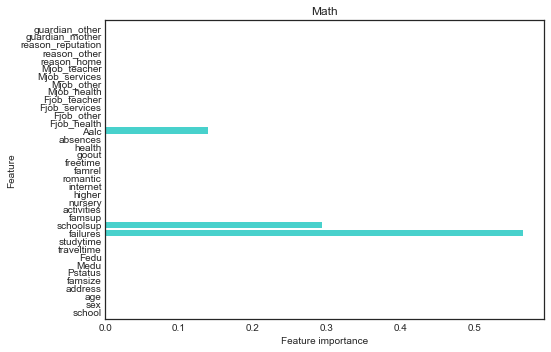

In [295]:
def plot_feature_importances_m(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center', color='#48D1CC')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Math")
    
fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot(121)
tree_m = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)
plot_feature_importances_m (tree_m)
plt.tight_layout()

The heigst test score is 0.25 , that too using Linear Regression technique. 
However the max score that can be achived is 1 hence the reason for saing that the prediction models have poor performance.
Using decision tree we found out that failures is the most important feature forllowed by schoolsup & Aalc respectively.
